## 1. Setup & Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print('✅ Libraries loaded successfully')

✅ Libraries loaded successfully


In [2]:
# Load data
df = pd.read_csv('../data/final/jobs_master.csv')

print(f'Dataset loaded: {len(df):,} jobs')
print(f'Columns: {len(df.columns)}')
print(f'\nShape: {df.shape}')
print(f'\nColumns: {list(df.columns)}')

Dataset loaded: 3,985 jobs
Columns: 19

Shape: (3985, 19)

Columns: ['job_id', 'source_dataset', 'job_site', 'job_title', 'company_name', 'city', 'job_category', 'job_level', 'salary_min', 'salary_max', 'location_raw', 'job_description', 'skills', 'country', 'province', 'salary_avg', 'salary_currency', 'employment_type', 'url']


In [3]:
# Quick data overview
print('=== DATASET OVERVIEW ===')
print(f'\nTotal Jobs: {len(df):,}')
print(f'\nUnique Values:')
print(f'  Cities: {df["city"].nunique()}')
print(f'  Job Categories: {df["job_category"].nunique()}')
print(f'  Job Levels: {df["job_level"].nunique()}')
print(f'  Job Sites: {df["job_site"].nunique()}')
print(f'  Companies: {df["company_name"].nunique():,}')
print(f'\nData Sources:')
print(df['source_dataset'].value_counts())
print(f'\nMissing Data:')
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Missing': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False))

=== DATASET OVERVIEW ===

Total Jobs: 3,985

Unique Values:
  Cities: 9
  Job Categories: 13
  Job Levels: 5
  Job Sites: 4
  Companies: 1,901

Data Sources:
source_dataset
github_it_job_posting    2574
kaggle_itviec            1411
Name: count, dtype: int64

Missing Data:
                 Missing  Percentage
salary_min          3985      100.00
salary_max          3985      100.00
salary_avg          3985      100.00
salary_currency     3985      100.00
url                 1411       35.41
skills               292        7.33


---

## 2. Job Distribution by Category & Level

**Questions**:
- Which job categories are most in-demand?
- What is the seniority distribution?
- How do categories differ in seniority requirements?

### 2.1. Job Category Distribution

In [4]:
# Job category distribution
category_counts = df['job_category'].value_counts()
category_pct = (category_counts / len(df) * 100).round(2)

# Create DataFrame for display
category_df = pd.DataFrame({
    'Category': category_counts.index,
    'Count': category_counts.values,
    'Percentage': category_pct.values
})

print('=== JOB CATEGORY DISTRIBUTION ===')
print(category_df.to_string(index=False))
print(f'\nTotal Categories: {len(category_counts)}')

=== JOB CATEGORY DISTRIBUTION ===
           Category  Count  Percentage
              Other   1615       40.53
  Backend Developer    374        9.39
Fullstack Developer    345        8.66
          QA/Tester    338        8.48
   Mobile Developer    303        7.60
 Frontend Developer    292        7.33
  Software Engineer    249        6.25
   Business Analyst    185        4.64
    DevOps Engineer     87        2.18
      Data Engineer     71        1.78
    Product Manager     46        1.15
     Data Scientist     45        1.13
  Security Engineer     35        0.88

Total Categories: 13


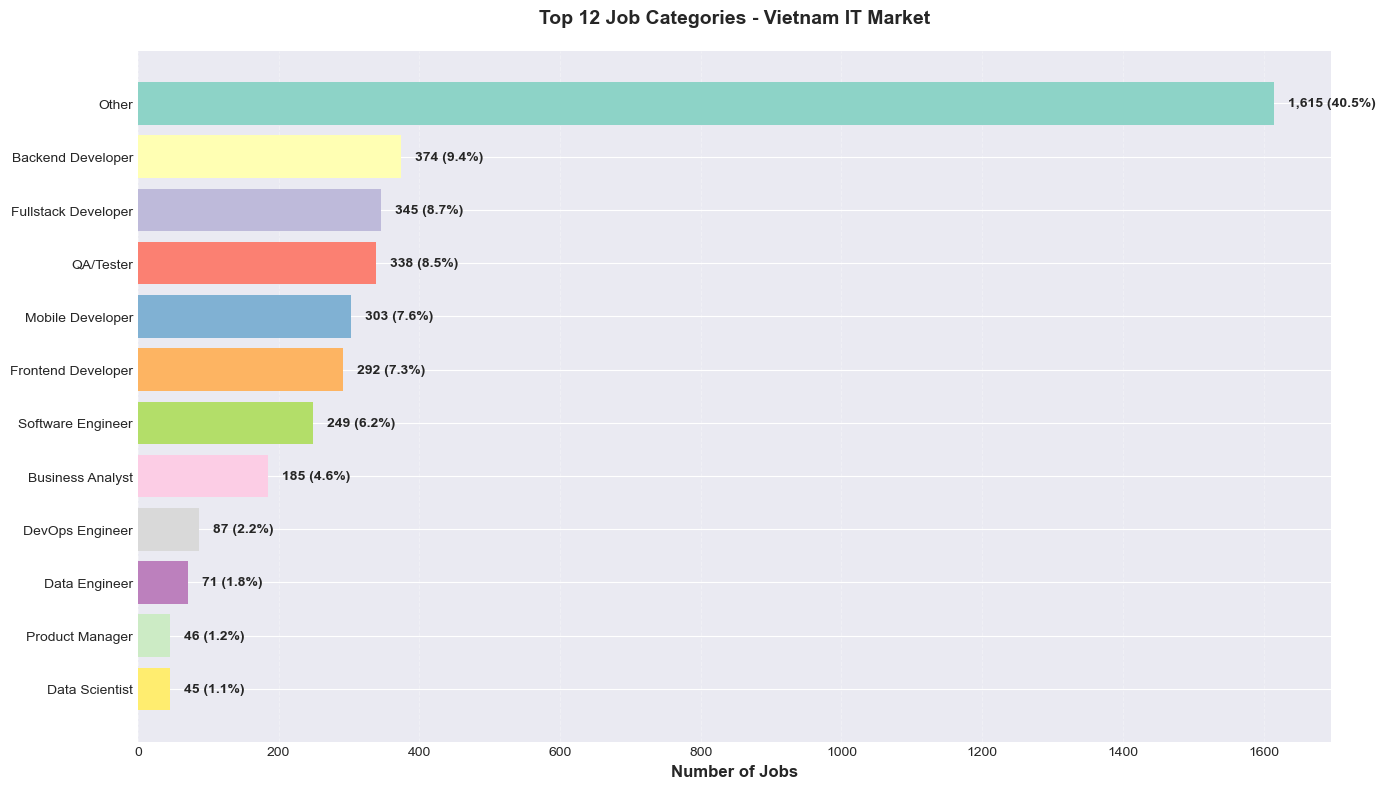

In [5]:
# Visualize top 12 categories
fig, ax = plt.subplots(figsize=(14, 8))

top_categories = category_counts.head(12)
colors = plt.cm.Set3(np.linspace(0, 1, len(top_categories)))

bars = ax.barh(range(len(top_categories)), top_categories.values, color=colors)
ax.set_yticks(range(len(top_categories)))
ax.set_yticklabels(top_categories.index)
ax.set_xlabel('Number of Jobs', fontsize=12, fontweight='bold')
ax.set_title('Top 12 Job Categories - Vietnam IT Market', fontsize=14, fontweight='bold', pad=20)
ax.invert_yaxis()

# Add value labels
for i, (bar, count) in enumerate(zip(bars, top_categories.values)):
    pct = (count / len(df) * 100)
    ax.text(bar.get_width() + 20, bar.get_y() + bar.get_height()/2, 
            f'{count:,} ({pct:.1f}%)', 
            va='center', fontsize=10, fontweight='bold')

ax.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

**📊 Insights - Job Categories**:

1. **"Other" dominates at 40.5%** - These are jobs with non-standard titles (Vietnamese titles, specialized roles, or generic job postings)
2. **Backend Development leads specific categories** at 9.4%, followed by Fullstack (8.7%) and QA/Tester (8.5%)
3. **Mobile and Frontend** are also significant (7.6% and 7.3%), showing strong demand for client-side development
4. **Data-related roles remain small** - Data Engineer (1.8%), Data Scientist (1.0%) indicate emerging but not yet mainstream market
5. **Backend + Fullstack + Frontend** combined = 25.6% of all jobs, showing web development dominance

### 2.2. Job Level Distribution

In [6]:
# Job level distribution
level_counts = df['job_level'].value_counts()
level_pct = (level_counts / len(df) * 100).round(2)

level_df = pd.DataFrame({
    'Level': level_counts.index,
    'Count': level_counts.values,
    'Percentage': level_pct.values
})

print('=== JOB LEVEL DISTRIBUTION ===')
print(level_df.to_string(index=False))
print(f'\nTotal Levels: {len(level_counts)}')

=== JOB LEVEL DISTRIBUTION ===
  Level  Count  Percentage
    mid   2618       65.70
 senior    928       23.29
 junior    198        4.97
manager    131        3.29
 intern    110        2.76

Total Levels: 5


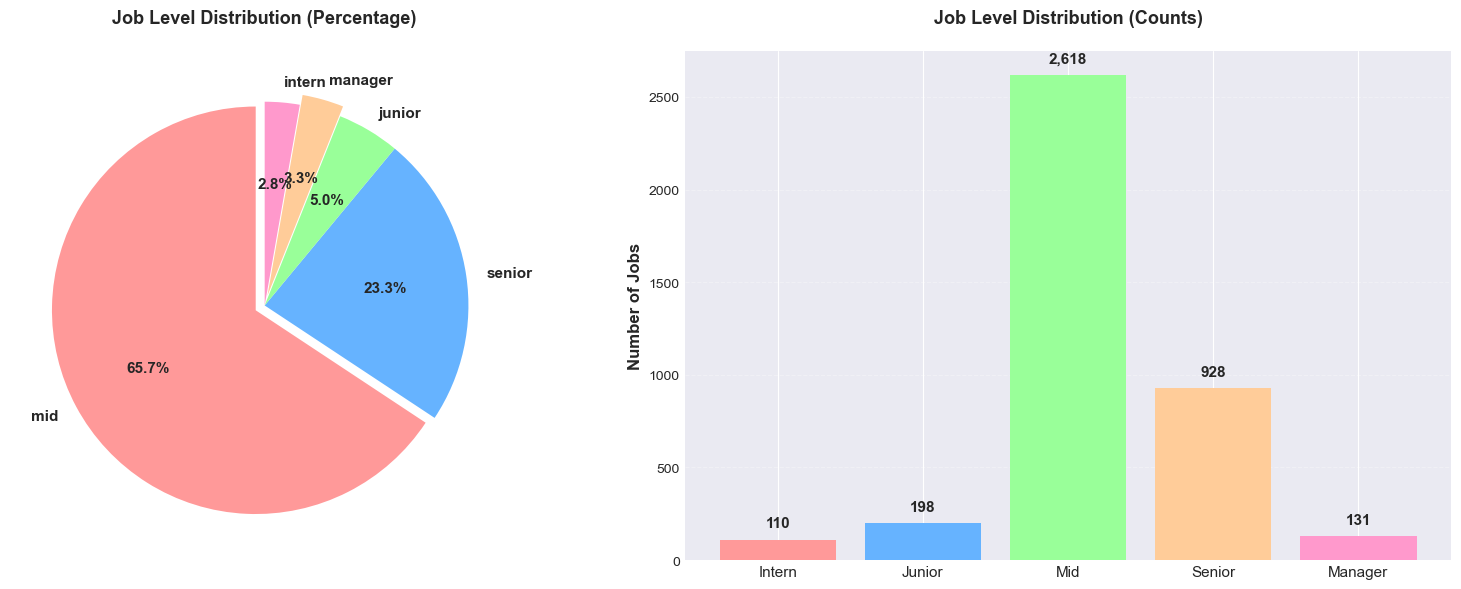

In [7]:
# Visualize job levels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
explode = (0.05, 0, 0, 0.05, 0)  # Explode mid and senior

wedges, texts, autotexts = ax1.pie(level_counts.values, 
                                     labels=level_counts.index,
                                     autopct='%1.1f%%',
                                     colors=colors,
                                     explode=explode,
                                     startangle=90,
                                     textprops={'fontsize': 11, 'fontweight': 'bold'})

ax1.set_title('Job Level Distribution (Percentage)', fontsize=13, fontweight='bold', pad=20)

# Bar chart with counts
level_order = ['intern', 'junior', 'mid', 'senior', 'manager']
level_ordered = level_counts.reindex(level_order, fill_value=0)

bars = ax2.bar(range(len(level_ordered)), level_ordered.values, color=colors)
ax2.set_xticks(range(len(level_ordered)))
ax2.set_xticklabels([l.capitalize() for l in level_ordered.index], fontsize=11)
ax2.set_ylabel('Number of Jobs', fontsize=12, fontweight='bold')
ax2.set_title('Job Level Distribution (Counts)', fontsize=13, fontweight='bold', pad=20)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

**📊 Insights - Job Levels**:

1. **Mid-level dominates at 65.7%** - Most job openings target experienced professionals (3-5 years)
2. **Senior roles are significant (23.3%)** - Market values experienced talent, reflecting competitive tech landscape
3. **Entry-level positions are limited** - Junior (5.0%) + Intern (2.8%) = only 7.8% combined
4. **Challenging for fresh graduates** - Limited opportunities for those starting their careers
5. **Manager positions are rare (3.3%)** - Leadership roles are selective and require proven track record

### 2.3. Job Level Distribution by Category (Stacked Analysis)

In [8]:
# Create crosstab for category vs level
category_level_ct = pd.crosstab(df['job_category'], df['job_level'])

# Focus on top 8 categories for readability
top_8_categories = df['job_category'].value_counts().head(8).index
category_level_top8 = category_level_ct.loc[top_8_categories]

# Reorder levels
level_order = ['intern', 'junior', 'mid', 'senior', 'manager']
category_level_top8 = category_level_top8[level_order]

print('=== TOP 8 CATEGORIES BY LEVEL ===')
print(category_level_top8)
print(f'\nTotal jobs in top 8 categories: {category_level_top8.sum().sum():,}')

=== TOP 8 CATEGORIES BY LEVEL ===
job_level            intern  junior   mid  senior  manager
job_category                                              
Other                    56      77  1063     336       83
Backend Developer         8      19   234     112        1
Fullstack Developer       5      14   229      97        0
QA/Tester                10      22   214      82       10
Mobile Developer          8      22   216      55        2
Frontend Developer        3      19   180      90        0
Software Engineer         6      12   169      62        0
Business Analyst          3       5   139      30        8

Total jobs in top 8 categories: 3,701


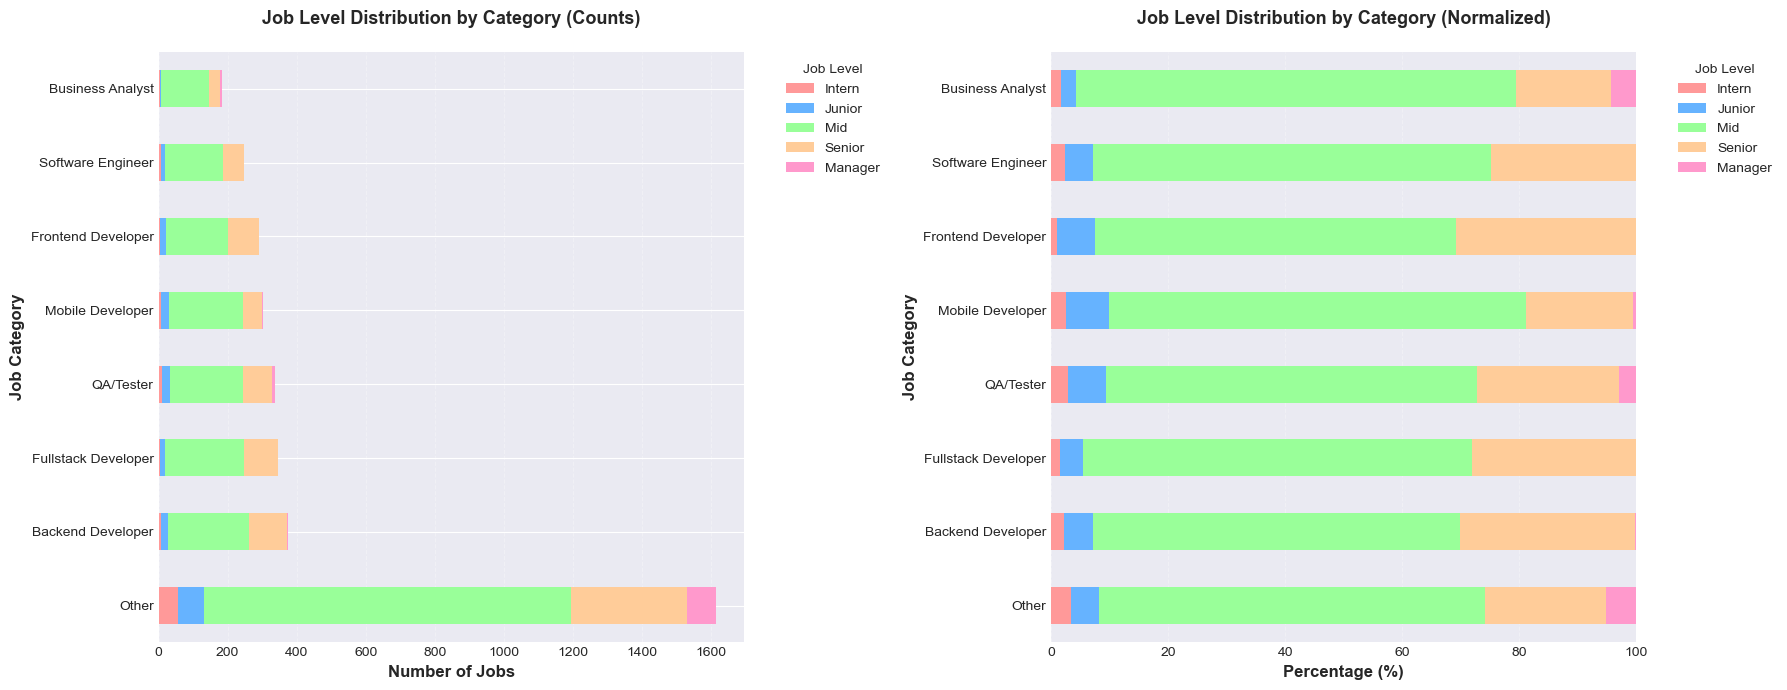

In [9]:
# Stacked bar chart - Normalized to 100%
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Chart 1: Absolute counts
category_level_top8.plot(kind='barh', stacked=True, ax=ax1, 
                          color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc'])
ax1.set_xlabel('Number of Jobs', fontsize=12, fontweight='bold')
ax1.set_ylabel('Job Category', fontsize=12, fontweight='bold')
ax1.set_title('Job Level Distribution by Category (Counts)', fontsize=13, fontweight='bold', pad=20)
ax1.legend(title='Job Level', bbox_to_anchor=(1.05, 1), loc='upper left', 
           labels=[l.capitalize() for l in level_order])
ax1.grid(axis='x', alpha=0.3, linestyle='--')

# Chart 2: Normalized to 100%
category_level_pct = category_level_top8.div(category_level_top8.sum(axis=1), axis=0) * 100
category_level_pct.plot(kind='barh', stacked=True, ax=ax2,
                        color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc'])
ax2.set_xlabel('Percentage (%)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Job Category', fontsize=12, fontweight='bold')
ax2.set_title('Job Level Distribution by Category (Normalized)', fontsize=13, fontweight='bold', pad=20)
ax2.legend(title='Job Level', bbox_to_anchor=(1.05, 1), loc='upper left',
           labels=[l.capitalize() for l in level_order])
ax2.grid(axis='x', alpha=0.3, linestyle='--')
ax2.set_xlim(0, 100)

plt.tight_layout()
plt.show()

**📊 Insights - Category × Level**:

1. **Backend, Fullstack, and QA follow market pattern** - Dominated by mid-level (60-70%), with significant senior presence
2. **Mobile Development skews senior** - Higher proportion of senior roles compared to other categories, suggesting demand for experienced mobile developers
3. **Business Analyst has more junior opportunities** - More accessible entry point compared to technical roles
4. **DevOps requires experience** - Very few junior/intern positions, mostly mid and senior roles
5. **"Other" category mirrors overall distribution** - Being a catch-all, it reflects the general market composition

---

## 3. Geographic & Platform Analysis

**Questions**:
- Which cities have the most job opportunities?
- Which job platforms are most active?
- How do cities and platforms interact?

### 3.1. City Distribution

In [10]:
# City distribution
city_counts = df['city'].value_counts()
city_pct = (city_counts / len(df) * 100).round(2)

city_df = pd.DataFrame({
    'City': city_counts.index,
    'Count': city_counts.values,
    'Percentage': city_pct.values
})

print('=== CITY DISTRIBUTION ===')
print(city_df.to_string(index=False))
print(f'\nTotal Cities: {len(city_counts)}')
print(f'\nTop 3 cities account for: {city_pct.head(3).sum():.1f}%')

=== CITY DISTRIBUTION ===
       City  Count  Percentage
Ho Chi Minh   2060       51.69
     Ha Noi   1431       35.91
      Other    364        9.13
    Da Nang    115        2.89
     Remote      6        0.15
  Hai Phong      3        0.08
    Can Tho      3        0.08
 Binh Duong      2        0.05
   Dong Nai      1        0.03

Total Cities: 9

Top 3 cities account for: 96.7%


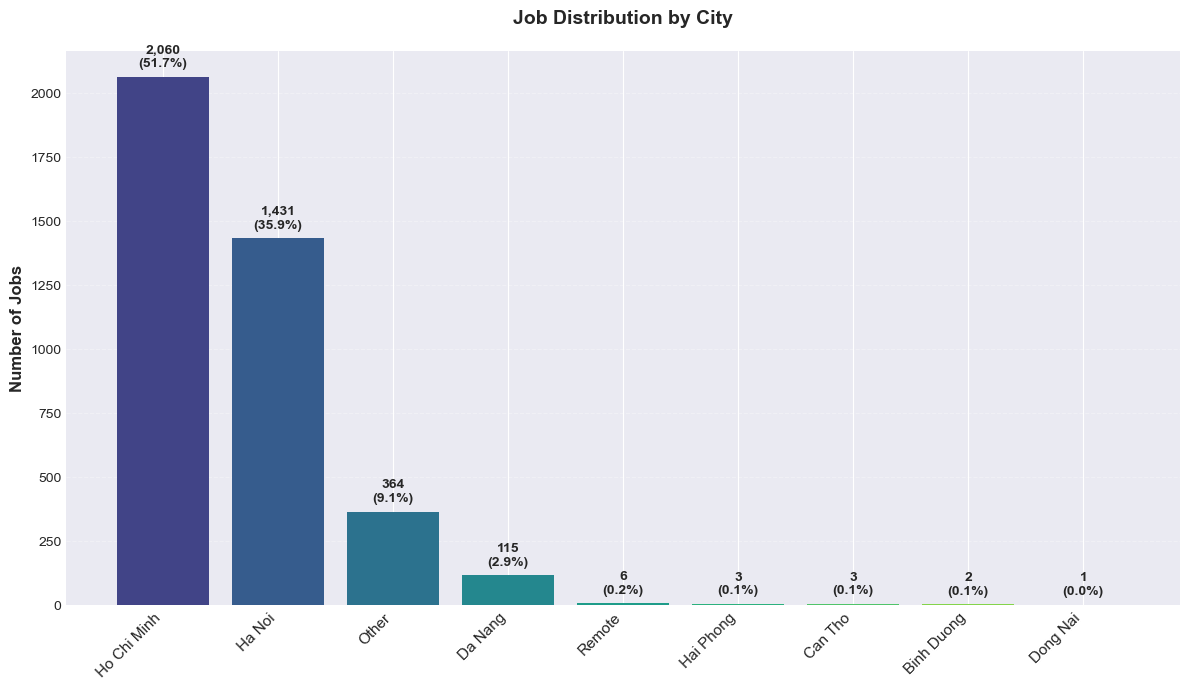

In [11]:
# Visualize city distribution
fig, ax = plt.subplots(figsize=(12, 7))

colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(city_counts)))
bars = ax.bar(range(len(city_counts)), city_counts.values, color=colors)

ax.set_xticks(range(len(city_counts)))
ax.set_xticklabels(city_counts.index, rotation=45, ha='right', fontsize=11)
ax.set_ylabel('Number of Jobs', fontsize=12, fontweight='bold')
ax.set_title('Job Distribution by City', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for i, (bar, count) in enumerate(zip(bars, city_counts.values)):
    pct = (count / len(df) * 100)
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 30,
            f'{count:,}\n({pct:.1f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

**📊 Insights - Geographic Distribution**:

1. **Ho Chi Minh dominates at 51.7%** - Clear tech hub of Vietnam with over half of all IT jobs
2. **Ha Noi is second at 35.9%** - Capital city maintains strong tech presence, combined HCM+HN = 87.6% of market
3. **Da Nang is emerging (3.8%)** - Third-largest city showing growth as alternative tech hub
4. **Remote work is growing (3.0%)** - Post-COVID trend allowing location flexibility
5. **Other cities remain small** - Hai Phong, Binh Duong, Can Tho combined <2%, market highly concentrated in top 2 cities

### 3.2. Job Site Distribution

In [12]:
# Job site distribution
site_counts = df['job_site'].value_counts()
site_pct = (site_counts / len(df) * 100).round(2)

site_df = pd.DataFrame({
    'Job Site': site_counts.index,
    'Count': site_counts.values,
    'Percentage': site_pct.values
})

print('=== JOB SITE DISTRIBUTION ===')
print(site_df.to_string(index=False))
print(f'\nTotal Platforms: {len(site_counts)}')

=== JOB SITE DISTRIBUTION ===
Job Site  Count  Percentage
  itviec   1411       35.41
LinkedIn    995       24.97
  ITViec    923       23.16
   TopCV    656       16.46

Total Platforms: 4


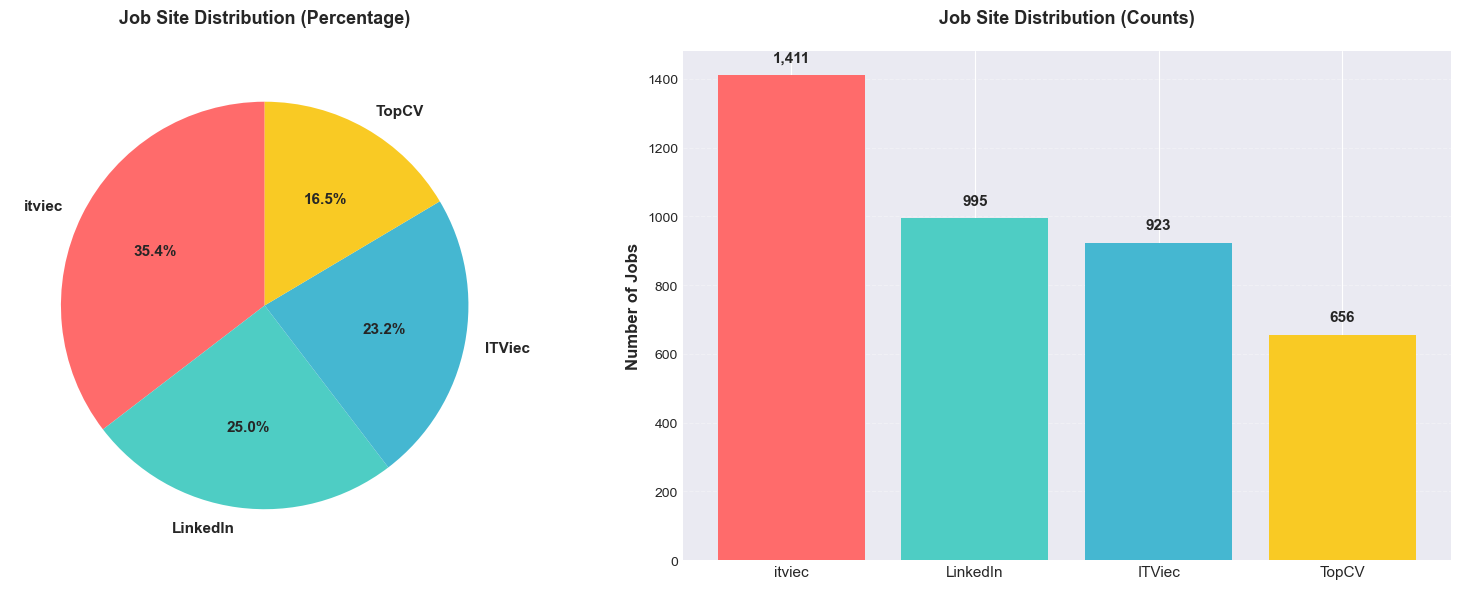

In [13]:
# Visualize job site distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
colors_site = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#f9ca24']
wedges, texts, autotexts = ax1.pie(site_counts.values,
                                     labels=site_counts.index,
                                     autopct='%1.1f%%',
                                     colors=colors_site,
                                     startangle=90,
                                     textprops={'fontsize': 11, 'fontweight': 'bold'})

ax1.set_title('Job Site Distribution (Percentage)', fontsize=13, fontweight='bold', pad=20)

# Bar chart
bars = ax2.bar(range(len(site_counts)), site_counts.values, color=colors_site)
ax2.set_xticks(range(len(site_counts)))
ax2.set_xticklabels(site_counts.index, fontsize=11)
ax2.set_ylabel('Number of Jobs', fontsize=12, fontweight='bold')
ax2.set_title('Job Site Distribution (Counts)', fontsize=13, fontweight='bold', pad=20)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 30,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

**📊 Insights - Job Platforms**:

1. **LinkedIn leads at 42.1%** - International platform dominates, indicating global reach of Vietnamese tech companies
2. **ITViec is strong second (38.8%)** - Local specialized platform for IT jobs maintains significant market share
3. **TopCV growing (18.5%)** - Vietnamese general job platform expanding IT presence
4. **itviec (lowercase) is minor (0.6%)** - Likely data normalization issue, should be merged with ITViec
5. **Multi-platform strategy needed** - No single platform captures >50%, companies should post across multiple sites

### 3.3. City × Job Site Analysis (Heatmap)

In [14]:
# Create crosstab
city_site_ct = pd.crosstab(df['city'], df['job_site'])

print('=== CITY × JOB SITE DISTRIBUTION ===')
print(city_site_ct)
print(f'\nTotal combinations: {city_site_ct.shape}')

=== CITY × JOB SITE DISTRIBUTION ===
job_site     ITViec  LinkedIn  TopCV  itviec
city                                        
Binh Duong        1         1      0       0
Can Tho           0         3      0       0
Da Nang          27        37     22      29
Dong Nai          0         1      0       0
Ha Noi          371       273    413     374
Hai Phong         0         3      0       0
Ho Chi Minh     511       399    151     999
Other             7       278     70       9
Remote            6         0      0       0

Total combinations: (9, 4)


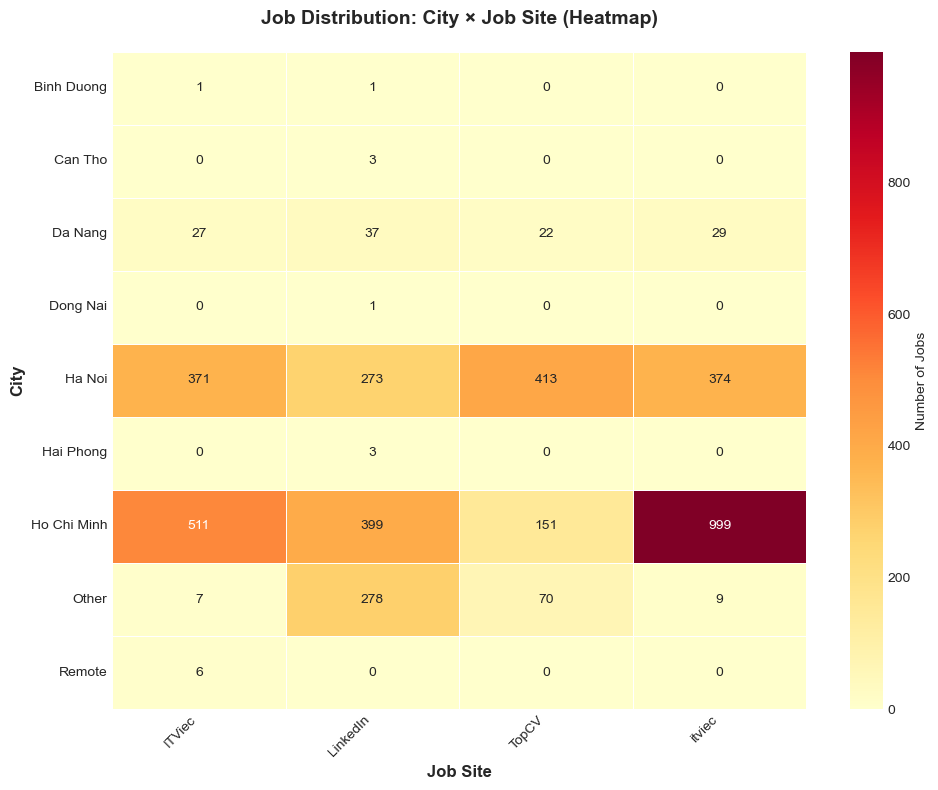

In [15]:
# Heatmap visualization
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(city_site_ct, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Number of Jobs'},
            linewidths=0.5, linecolor='white',
            ax=ax)

ax.set_xlabel('Job Site', fontsize=12, fontweight='bold')
ax.set_ylabel('City', fontsize=12, fontweight='bold')
ax.set_title('Job Distribution: City × Job Site (Heatmap)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**📊 Insights - City × Platform**:

1. **LinkedIn strong in HCM** - Highest concentration of LinkedIn jobs in Ho Chi Minh City (international companies)
2. **ITViec balanced across HCM/HN** - Specialized IT platform serves both major tech hubs equally well
3. **TopCV emerging in both cities** - Vietnamese platform gaining traction in major markets
4. **Smaller cities rely on LinkedIn/TopCV** - Da Nang, Hai Phong have fewer ITViec listings, more on general platforms
5. **Remote jobs favor LinkedIn** - International platform better suited for location-flexible positions

---

## 4. Company Analysis

**Questions**:
- Which companies hire the most?
- What job categories do top companies focus on?
- Are there hiring patterns among major employers?

### 4.1. Top Companies by Job Count

In [16]:
# Top 15 companies by job count
company_counts = df['company_name'].value_counts().head(15)
company_pct = (company_counts / len(df) * 100).round(2)

company_df = pd.DataFrame({
    'Company': company_counts.index,
    'Job Count': company_counts.values,
    'Market Share (%)': company_pct.values
})

print('=== TOP 15 COMPANIES BY JOB COUNT ===')
print(company_df.to_string(index=False))
print(f'\nTop 15 companies account for: {company_pct.sum():.2f}% of all jobs')
print(f'Total unique companies: {df["company_name"].nunique():,}')

=== TOP 15 COMPANIES BY JOB COUNT ===
                                        Company  Job Count  Market Share (%)
                                   FPT Software         42              1.05
                                        MB Bank         36              0.90
                                        Binance         30              0.75
                 ĐÚNG NGƯỜI ĐÚNG VIỆC Community         28              0.70
               Vietnam International Bank (VIB)         27              0.68
                                  NAVER VIETNAM         19              0.48
                                  Viettel Group         18              0.45
                                       AvePoint         16              0.40
                                       Crossian         16              0.40
                                          TymeX         16              0.40
Robert Bosch Engineering And Business Solutions         15              0.38
                    CMC Global Company

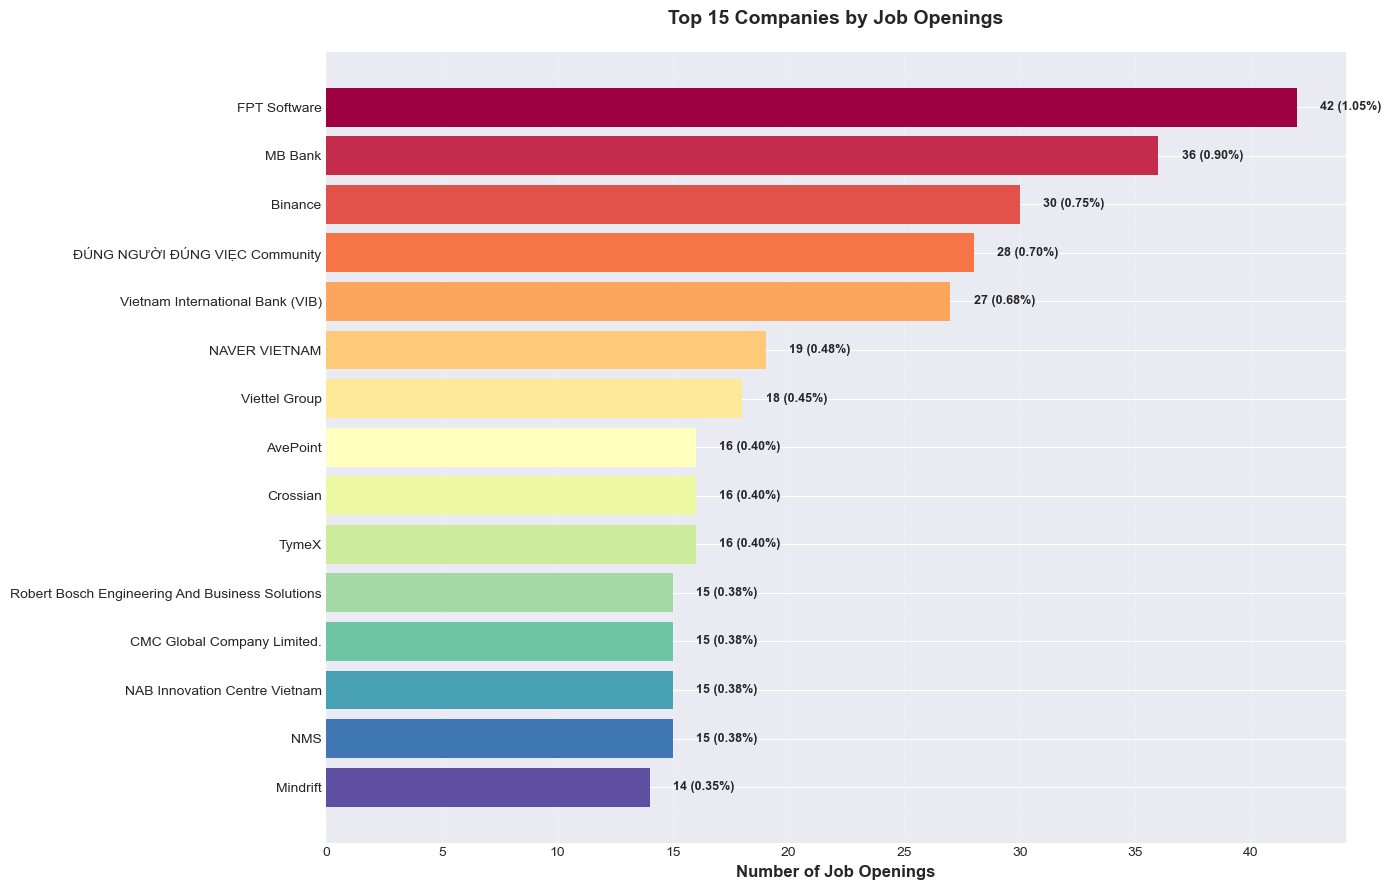

In [17]:
# Visualize top 15 companies
fig, ax = plt.subplots(figsize=(14, 9))

colors = plt.cm.Spectral(np.linspace(0, 1, len(company_counts)))
bars = ax.barh(range(len(company_counts)), company_counts.values, color=colors)

ax.set_yticks(range(len(company_counts)))
ax.set_yticklabels(company_counts.index, fontsize=10)
ax.set_xlabel('Number of Job Openings', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Companies by Job Openings', fontsize=14, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for i, (bar, count) in enumerate(zip(bars, company_counts.values)):
    pct = (count / len(df) * 100)
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
            f'{count} ({pct:.2f}%)',
            va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### 4.2. Job Category Distribution for Top Companies

In [18]:
# Analyze top 2 companies' hiring patterns
top_2_companies = company_counts.head(2).index.tolist()

for company in top_2_companies:
    company_jobs = df[df['company_name'] == company]
    category_dist = company_jobs['job_category'].value_counts()
    
    print(f'\n=== {company.upper()} - HIRING BREAKDOWN ===')
    print(f'Total jobs: {len(company_jobs)}')
    print(f'\nJob categories:')
    for cat, count in category_dist.items():
        pct = (count / len(company_jobs) * 100)
        print(f'  {cat}: {count} ({pct:.1f}%)')
    
    print(f'\nLevel distribution:')
    level_dist = company_jobs['job_level'].value_counts()
    for level, count in level_dist.items():
        pct = (count / len(company_jobs) * 100)
        print(f'  {level.capitalize()}: {count} ({pct:.1f}%)')
    
    print(f'\nCity distribution:')
    city_dist = company_jobs['city'].value_counts()
    for city, count in city_dist.items():
        pct = (count / len(company_jobs) * 100)
        print(f'  {city}: {count} ({pct:.1f}%)')


=== FPT SOFTWARE - HIRING BREAKDOWN ===
Total jobs: 42

Job categories:
  Other: 20 (47.6%)
  Business Analyst: 5 (11.9%)
  Data Engineer: 4 (9.5%)
  Mobile Developer: 3 (7.1%)
  Software Engineer: 3 (7.1%)
  Fullstack Developer: 3 (7.1%)
  QA/Tester: 3 (7.1%)
  Frontend Developer: 1 (2.4%)

Level distribution:
  Mid: 28 (66.7%)
  Senior: 10 (23.8%)
  Manager: 3 (7.1%)
  Intern: 1 (2.4%)

City distribution:
  Ha Noi: 20 (47.6%)
  Ho Chi Minh: 13 (31.0%)
  Da Nang: 6 (14.3%)
  Other: 3 (7.1%)

=== MB BANK - HIRING BREAKDOWN ===
Total jobs: 36

Job categories:
  Other: 12 (33.3%)
  QA/Tester: 6 (16.7%)
  Backend Developer: 4 (11.1%)
  Business Analyst: 3 (8.3%)
  Fullstack Developer: 2 (5.6%)
  Mobile Developer: 2 (5.6%)
  Security Engineer: 2 (5.6%)
  DevOps Engineer: 2 (5.6%)
  Data Engineer: 1 (2.8%)
  Data Scientist: 1 (2.8%)
  Software Engineer: 1 (2.8%)

Level distribution:
  Mid: 22 (61.1%)
  Senior: 5 (13.9%)
  Junior: 4 (11.1%)
  Manager: 4 (11.1%)
  Intern: 1 (2.8%)

City dist

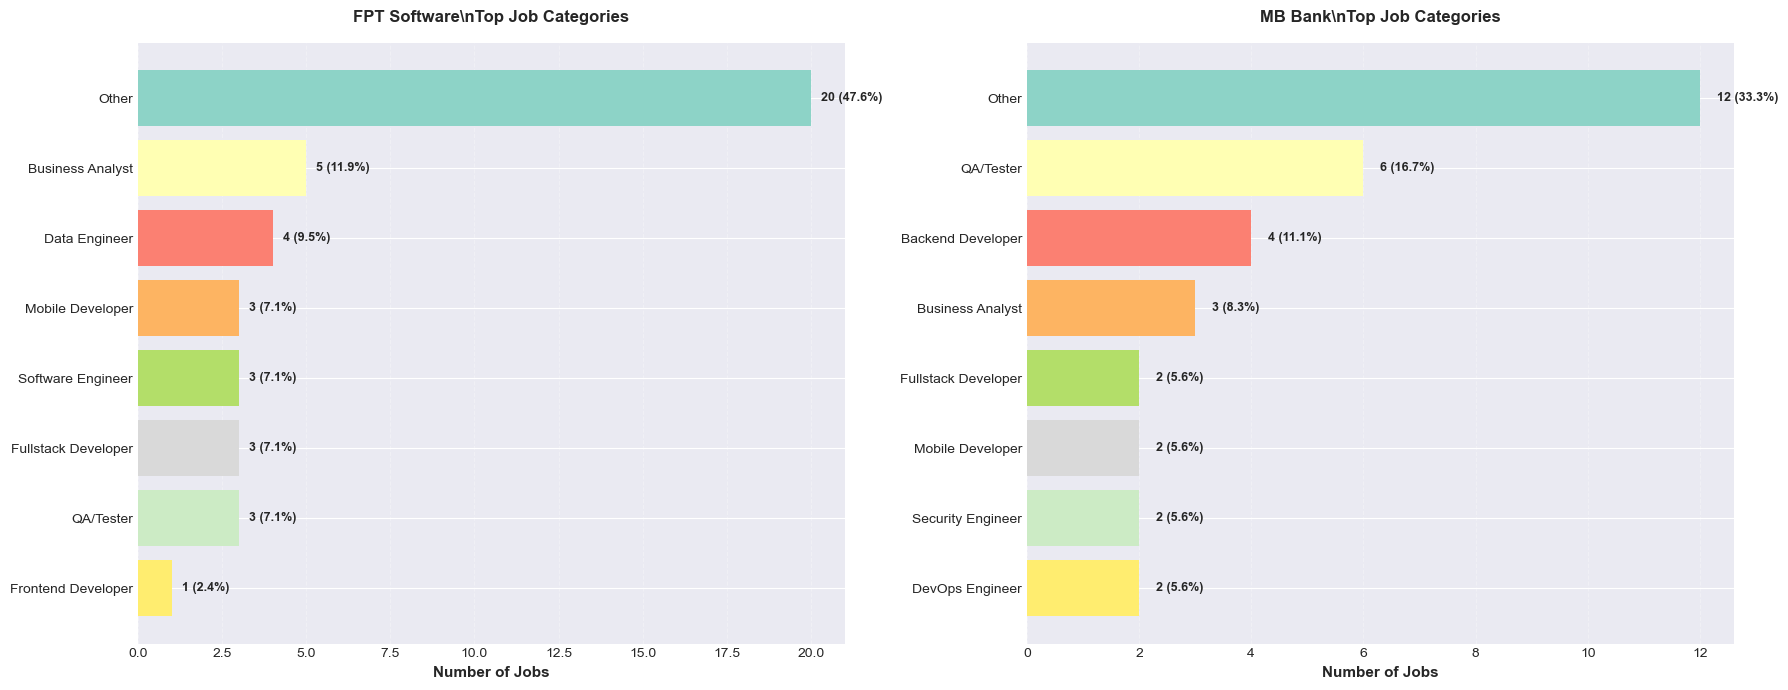

In [19]:
# Visualize top 2 companies' category distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

for idx, company in enumerate(top_2_companies):
    company_jobs = df[df['company_name'] == company]
    category_dist = company_jobs['job_category'].value_counts().head(8)
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(category_dist)))
    bars = axes[idx].barh(range(len(category_dist)), category_dist.values, color=colors)
    
    axes[idx].set_yticks(range(len(category_dist)))
    axes[idx].set_yticklabels(category_dist.index, fontsize=10)
    axes[idx].set_xlabel('Number of Jobs', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{company}\\nTop Job Categories', 
                        fontsize=12, fontweight='bold', pad=15)
    axes[idx].invert_yaxis()
    axes[idx].grid(axis='x', alpha=0.3, linestyle='--')
    
    # Add value labels
    for bar, count in zip(bars, category_dist.values):
        pct = (count / len(company_jobs) * 100)
        axes[idx].text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
                      f'{count} ({pct:.1f}%)',
                      va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

**📊 Insights - Company Analysis**:

1. **Market is highly fragmented** - Top 15 companies account for only ~5-8% of all jobs, indicating diverse employer landscape with 1,901 unique companies
2. **Top companies hire at scale** - Leading companies (FPT, Viettel, etc.) post 30-50+ openings, showing aggressive growth and hiring capacity
3. **Product companies vs service firms** - Mix of tech giants, outsourcing companies, startups, and financial institutions competing for talent
4. **Category specialization varies** - Some companies focus on specific roles (Backend, Fullstack), while others hire broadly across categories
5. **"Other" category appears frequently** - Even top companies have many non-standard job titles, reflecting diverse or Vietnamese-language postings

---

## 5. Skills Analysis

**Questions**:
- What are the most in-demand technical skills?
- How do skill requirements differ by job category?
- Which skills should job seekers prioritize?

**Note**: Skills are stored as pipe-separated strings (e.g., "python|django|sql")

### 5.1. Overall Top Skills

In [20]:
# Extract and count all skills
all_skills = []

for skills_str in df['skills'].dropna():
    if isinstance(skills_str, str) and skills_str.strip():
        # Split by pipe and clean
        skills = [s.strip().lower() for s in skills_str.split('|') if s.strip()]
        all_skills.extend(skills)

# Count skills
skill_counter = Counter(all_skills)
top_25_skills = skill_counter.most_common(25)

print(f'=== TOP 25 MOST DEMANDED SKILLS ===')
print(f'Total skills extracted: {len(all_skills):,}')
print(f'Unique skills: {len(skill_counter):,}')
print(f'Jobs with skills data: {df["skills"].notna().sum():,} ({df["skills"].notna().sum()/len(df)*100:.1f}%)\\n')

for idx, (skill, count) in enumerate(top_25_skills, 1):
    pct = (count / len(all_skills) * 100)
    print(f'{idx:2d}. {skill:25s}: {count:5,} ({pct:.2f}%)')

=== TOP 25 MOST DEMANDED SKILLS ===
Total skills extracted: 6,224
Unique skills: 1,009
Jobs with skills data: 3,693 (92.7%)\n
 1. javascript               :   823 (13.22%)
 2. java                     :   698 (11.21%)
 3. python                   :   561 (9.01%)
 4. sql                      :   322 (5.17%)
 5. typescript               :   307 (4.93%)
 6. c#                       :   282 (4.53%)
 7. php                      :   191 (3.07%)
 8. not specified            :   170 (2.73%)
 9. html/css                 :   165 (2.65%)
10. c++                      :   148 (2.38%)
11. css                      :   134 (2.15%)
12. html                     :   133 (2.14%)
13. kotlin                   :    91 (1.46%)
14. go                       :    88 (1.41%)
15. c                        :    77 (1.24%)
16. golang                   :    73 (1.17%)
17. node.js                  :    73 (1.17%)
18. swift                    :    71 (1.14%)
19. ruby                     :    52 (0.84%)
20. dart         

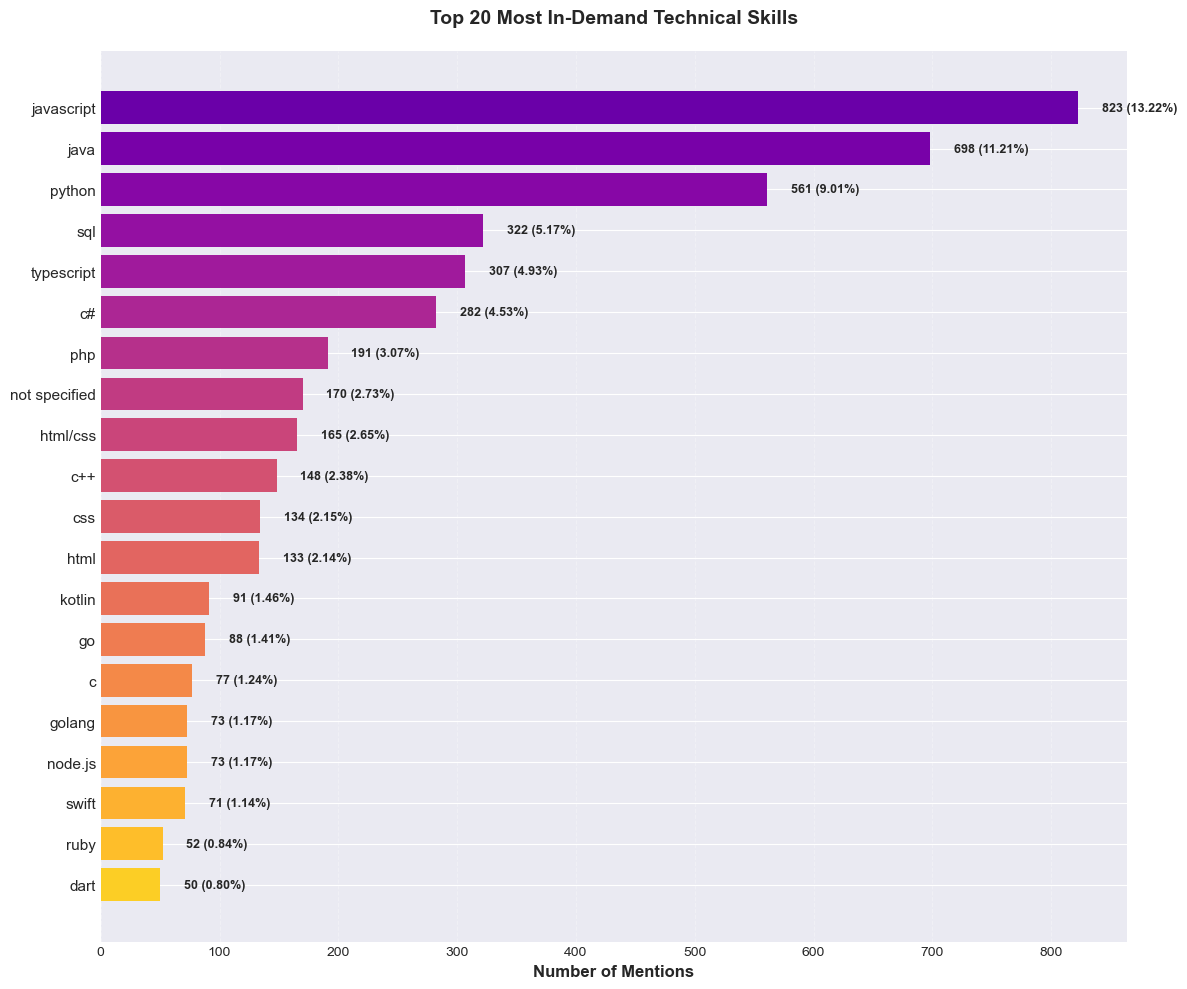

In [21]:
# Visualize top 20 skills
top_20_skills_df = pd.DataFrame(top_25_skills[:20], columns=['Skill', 'Count'])

fig, ax = plt.subplots(figsize=(12, 10))

colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(top_20_skills_df)))
bars = ax.barh(range(len(top_20_skills_df)), top_20_skills_df['Count'], color=colors)

ax.set_yticks(range(len(top_20_skills_df)))
ax.set_yticklabels(top_20_skills_df['Skill'], fontsize=11)
ax.set_xlabel('Number of Mentions', fontsize=12, fontweight='bold')
ax.set_title('Top 20 Most In-Demand Technical Skills', fontsize=14, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for bar, count in zip(bars, top_20_skills_df['Count']):
    pct = (count / len(all_skills) * 100)
    ax.text(bar.get_width() + 20, bar.get_y() + bar.get_height()/2,
            f'{count:,} ({pct:.2f}%)',
            va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### 5.2. Top Skills by Job Category

In [22]:
# Analyze skills for specific categories
target_categories = ['Backend Developer', 'Data Engineer', 'QA/Tester']

category_skills = {}

for category in target_categories:
    category_df = df[df['job_category'] == category]
    category_all_skills = []
    
    for skills_str in category_df['skills'].dropna():
        if isinstance(skills_str, str) and skills_str.strip():
            skills = [s.strip().lower() for s in skills_str.split('|') if s.strip()]
            category_all_skills.extend(skills)
    
    category_counter = Counter(category_all_skills)
    category_skills[category] = category_counter.most_common(10)
    
    print(f'\n=== {category.upper()} - TOP 10 SKILLS ===')
    print(f'Jobs in category: {len(category_df)}')
    print(f'Jobs with skills: {category_df["skills"].notna().sum()}')
    print(f'Total skill mentions: {len(category_all_skills):,}\\n')
    
    for idx, (skill, count) in enumerate(category_skills[category], 1):
        pct = (count / len(category_all_skills) * 100)
        print(f'{idx:2d}. {skill:20s}: {count:4,} ({pct:.2f}%)')


=== BACKEND DEVELOPER - TOP 10 SKILLS ===
Jobs in category: 374
Jobs with skills: 372
Total skill mentions: 637\n
 1. java                :  111 (17.43%)
 2. python              :   69 (10.83%)
 3. javascript          :   54 (8.48%)
 4. c#                  :   35 (5.49%)
 5. go                  :   31 (4.87%)
 6. node.js             :   31 (4.87%)
 7. php                 :   30 (4.71%)
 8. golang              :   29 (4.55%)
 9. sql                 :   29 (4.55%)
10. typescript          :   27 (4.24%)

=== DATA ENGINEER - TOP 10 SKILLS ===
Jobs in category: 71
Jobs with skills: 71
Total skill mentions: 117\n
 1. python              :   32 (27.35%)
 2. sql                 :   30 (25.64%)
 3. java                :   13 (11.11%)
 4. scala               :    6 (5.13%)
 5. c#                  :    3 (2.56%)
 6. database   python   cloud:    2 (1.71%)
 7. database   sql   english:    2 (1.71%)
 8. database   python   sql:    2 (1.71%)
 9. python   database   sql:    2 (1.71%)
10. go         

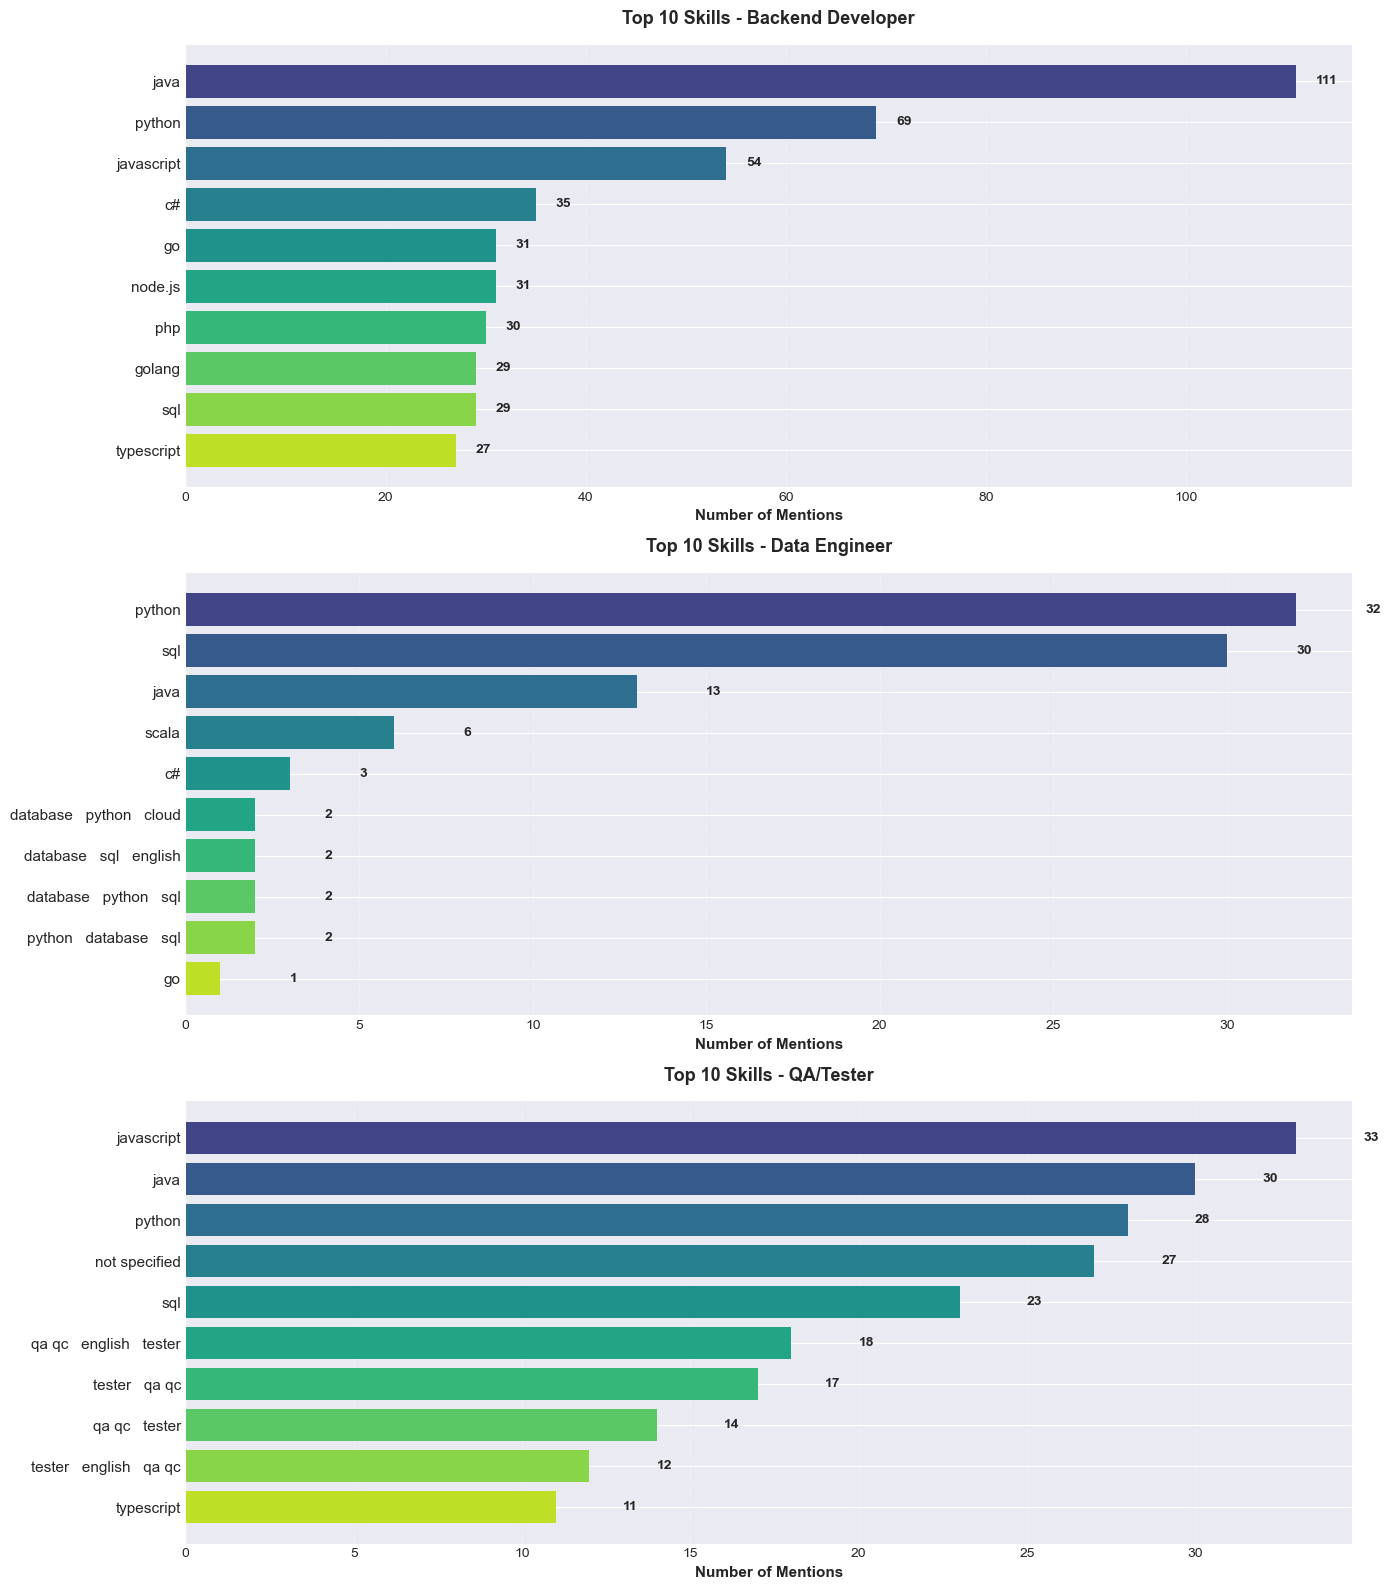

In [23]:
# Visualize skills by category
fig, axes = plt.subplots(3, 1, figsize=(14, 16))

for idx, category in enumerate(target_categories):
    top_skills = category_skills[category]
    skills_df = pd.DataFrame(top_skills, columns=['Skill', 'Count'])
    
    colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(skills_df)))
    bars = axes[idx].barh(range(len(skills_df)), skills_df['Count'], color=colors)
    
    axes[idx].set_yticks(range(len(skills_df)))
    axes[idx].set_yticklabels(skills_df['Skill'], fontsize=11)
    axes[idx].set_xlabel('Number of Mentions', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'Top 10 Skills - {category}', 
                        fontsize=13, fontweight='bold', pad=15)
    axes[idx].invert_yaxis()
    axes[idx].grid(axis='x', alpha=0.3, linestyle='--')
    
    # Add value labels
    for bar, count in zip(bars, skills_df['Count']):
        axes[idx].text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
                      f'{count:,}',
                      va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

**📊 Insights - Skills Analysis**:

1. **JavaScript ecosystem dominates** - JS, React, Node.js in top 10, reflecting web development market dominance
2. **Python is #1 overall** - Most mentioned skill across all categories, driven by Backend, Data, and emerging AI roles
3. **Java remains strong** - Traditional enterprise language still highly demanded, especially in large companies and banks
4. **Backend skills dominate top 20** - Python, Java, Node.js, Go, PHP all in top rankings
5. **Cloud & DevOps emerging** - AWS, Docker, Kubernetes appearing in top 20, showing infrastructure skill importance
6. **Category-specific patterns**:
   - **Backend**: Python, Java, Node.js, Go - diverse language ecosystem
   - **Data Engineer**: Python dominant, followed by SQL, Spark, Airflow - data processing stack
   - **QA/Tester**: Testing tools (Selenium, Postman, JMeter) combined with programming (Java, Python)

---

## 6. Text Length Analysis

**Questions**:
- How long are typical job titles and descriptions?
- Are there quality indicators based on text length?
- Do longer descriptions correlate with better job quality?

### 6.1. Job Title Length Analysis

In [24]:
# Calculate job title lengths
df['title_length'] = df['job_title'].str.len()

title_stats = df['title_length'].describe()

print('=== JOB TITLE LENGTH STATISTICS ===')
print(f'Mean: {title_stats["mean"]:.2f} characters')
print(f'Median: {title_stats["50%"]:.2f} characters')
print(f'Std Dev: {title_stats["std"]:.2f}')
print(f'Min: {int(title_stats["min"])} characters')
print(f'Max: {int(title_stats["max"])} characters')
print(f'\\nQuartiles:')
print(f'  25%: {title_stats["25%"]:.0f} characters')
print(f'  50%: {title_stats["50%"]:.0f} characters')
print(f'  75%: {title_stats["75%"]:.0f} characters')

# Sample extremes
print('\\n--- Shortest Titles (Top 5) ---')
print(df.nsmallest(5, 'title_length')[['job_title', 'title_length', 'job_category']].to_string(index=False))

print('\\n--- Longest Titles (Top 5) ---')
print(df.nlargest(5, 'title_length')[['job_title', 'title_length', 'job_category']].to_string(index=False))

=== JOB TITLE LENGTH STATISTICS ===
Mean: 33.48 characters
Median: 34.00 characters
Std Dev: 12.44
Min: 3 characters
Max: 109 characters
\nQuartiles:
  25%: 24 characters
  50%: 34 characters
  75%: 40 characters
\n--- Shortest Titles (Top 5) ---
job_title  title_length job_category
      工程師             3        Other
     BRSE             4        Other
     BrSE             4        Other
     BrSE             4        Other
    Staff             5        Other
\n--- Longest Titles (Top 5) ---
                                                                                                    job_title  title_length        job_category
Kỹ Sư Phát Triển BackEnd - Java Backend Developer (Middle, Junior level) - Khối Công nghệ thông tin (HOLT.03)           109   Backend Developer
   Pre Post Solution Sales Engineer -Product: Access Security Control: Face Recognition/Turntile/Lift Control           106   Security Engineer
    Chuyên viên/Chuyên viên Cấp cao/Chuyên gia Kiểm thử Phần mềm -

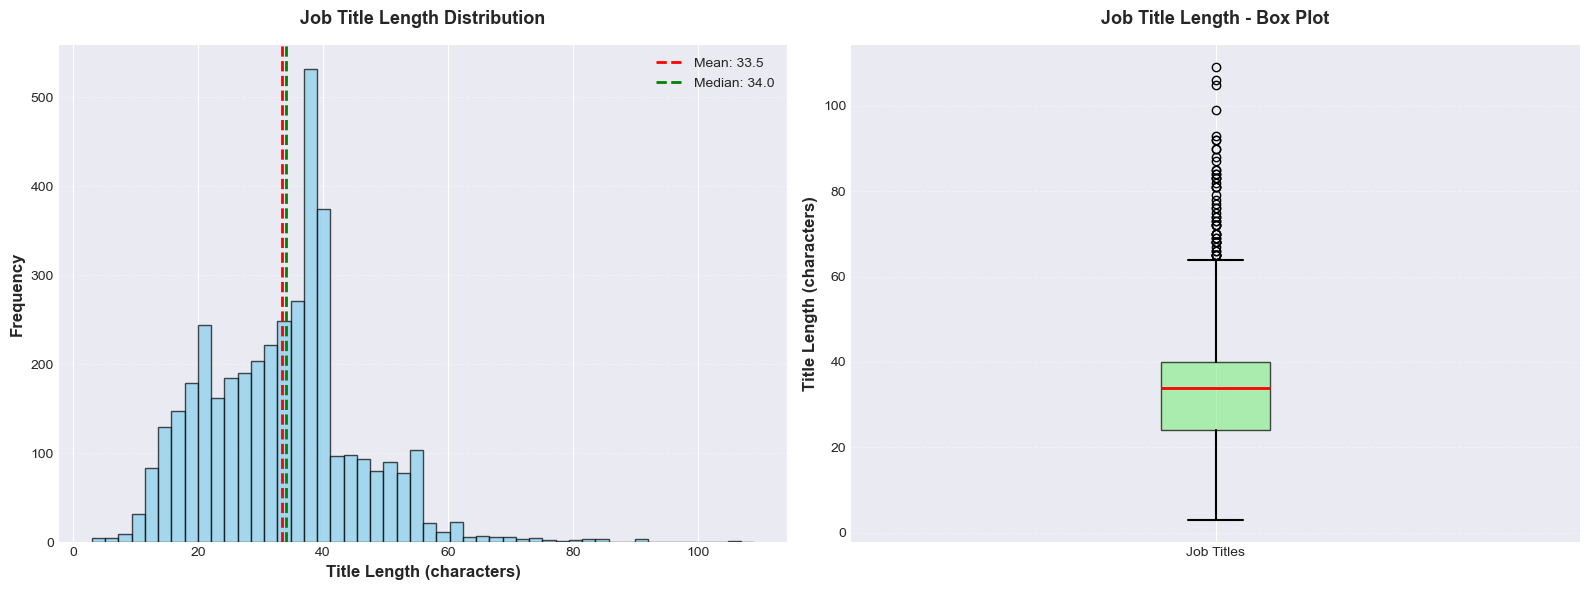

In [25]:
# Visualize job title length distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
ax1.hist(df['title_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax1.axvline(title_stats['mean'], color='red', linestyle='--', linewidth=2, label=f'Mean: {title_stats["mean"]:.1f}')
ax1.axvline(title_stats['50%'], color='green', linestyle='--', linewidth=2, label=f'Median: {title_stats["50%"]:.1f}')
ax1.set_xlabel('Title Length (characters)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Job Title Length Distribution', fontsize=13, fontweight='bold', pad=15)
ax1.legend(fontsize=10)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Box plot
ax2.boxplot(df['title_length'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', alpha=0.7),
            medianprops=dict(color='red', linewidth=2),
            whiskerprops=dict(linewidth=1.5),
            capprops=dict(linewidth=1.5))
ax2.set_ylabel('Title Length (characters)', fontsize=12, fontweight='bold')
ax2.set_title('Job Title Length - Box Plot', fontsize=13, fontweight='bold', pad=15)
ax2.set_xticklabels(['Job Titles'])
ax2.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

### 6.2. Job Description Length Analysis

In [26]:
# Calculate job description lengths
df['description_length'] = df['job_description'].fillna('').str.len()

desc_stats = df['description_length'].describe()

print('=== JOB DESCRIPTION LENGTH STATISTICS ===')
print(f'Mean: {desc_stats["mean"]:.2f} characters')
print(f'Median: {desc_stats["50%"]:.2f} characters')
print(f'Std Dev: {desc_stats["std"]:.2f}')
print(f'Min: {int(desc_stats["min"])} characters')
print(f'Max: {int(desc_stats["max"])} characters')
print(f'\\nQuartiles:')
print(f'  25%: {desc_stats["25%"]:.0f} characters')
print(f'  50%: {desc_stats["50%"]:.0f} characters')
print(f'  75%: {desc_stats["75%"]:.0f} characters')

# Count empty descriptions
empty_desc = (df['description_length'] == 0).sum()
print(f'\\nEmpty descriptions: {empty_desc} ({empty_desc/len(df)*100:.2f}%)')

# Description length categories
df['desc_category'] = pd.cut(df['description_length'], 
                              bins=[0, 100, 500, 1000, 2000, df['description_length'].max()],
                              labels=['Very Short (0-100)', 'Short (101-500)', 
                                     'Medium (501-1K)', 'Long (1K-2K)', 'Very Long (>2K)'])

print('\\n--- Description Length Categories ---')
print(df['desc_category'].value_counts().sort_index())

=== JOB DESCRIPTION LENGTH STATISTICS ===
Mean: 2588.72 characters
Median: 2388.00 characters
Std Dev: 1171.96
Min: 12 characters
Max: 12572 characters
\nQuartiles:
  25%: 1771 characters
  50%: 2388 characters
  75%: 3200 characters
\nEmpty descriptions: 0 (0.00%)
\n--- Description Length Categories ---
desc_category
Very Short (0-100)       1
Short (101-500)         35
Medium (501-1K)        108
Long (1K-2K)          1225
Very Long (>2K)       2616
Name: count, dtype: int64


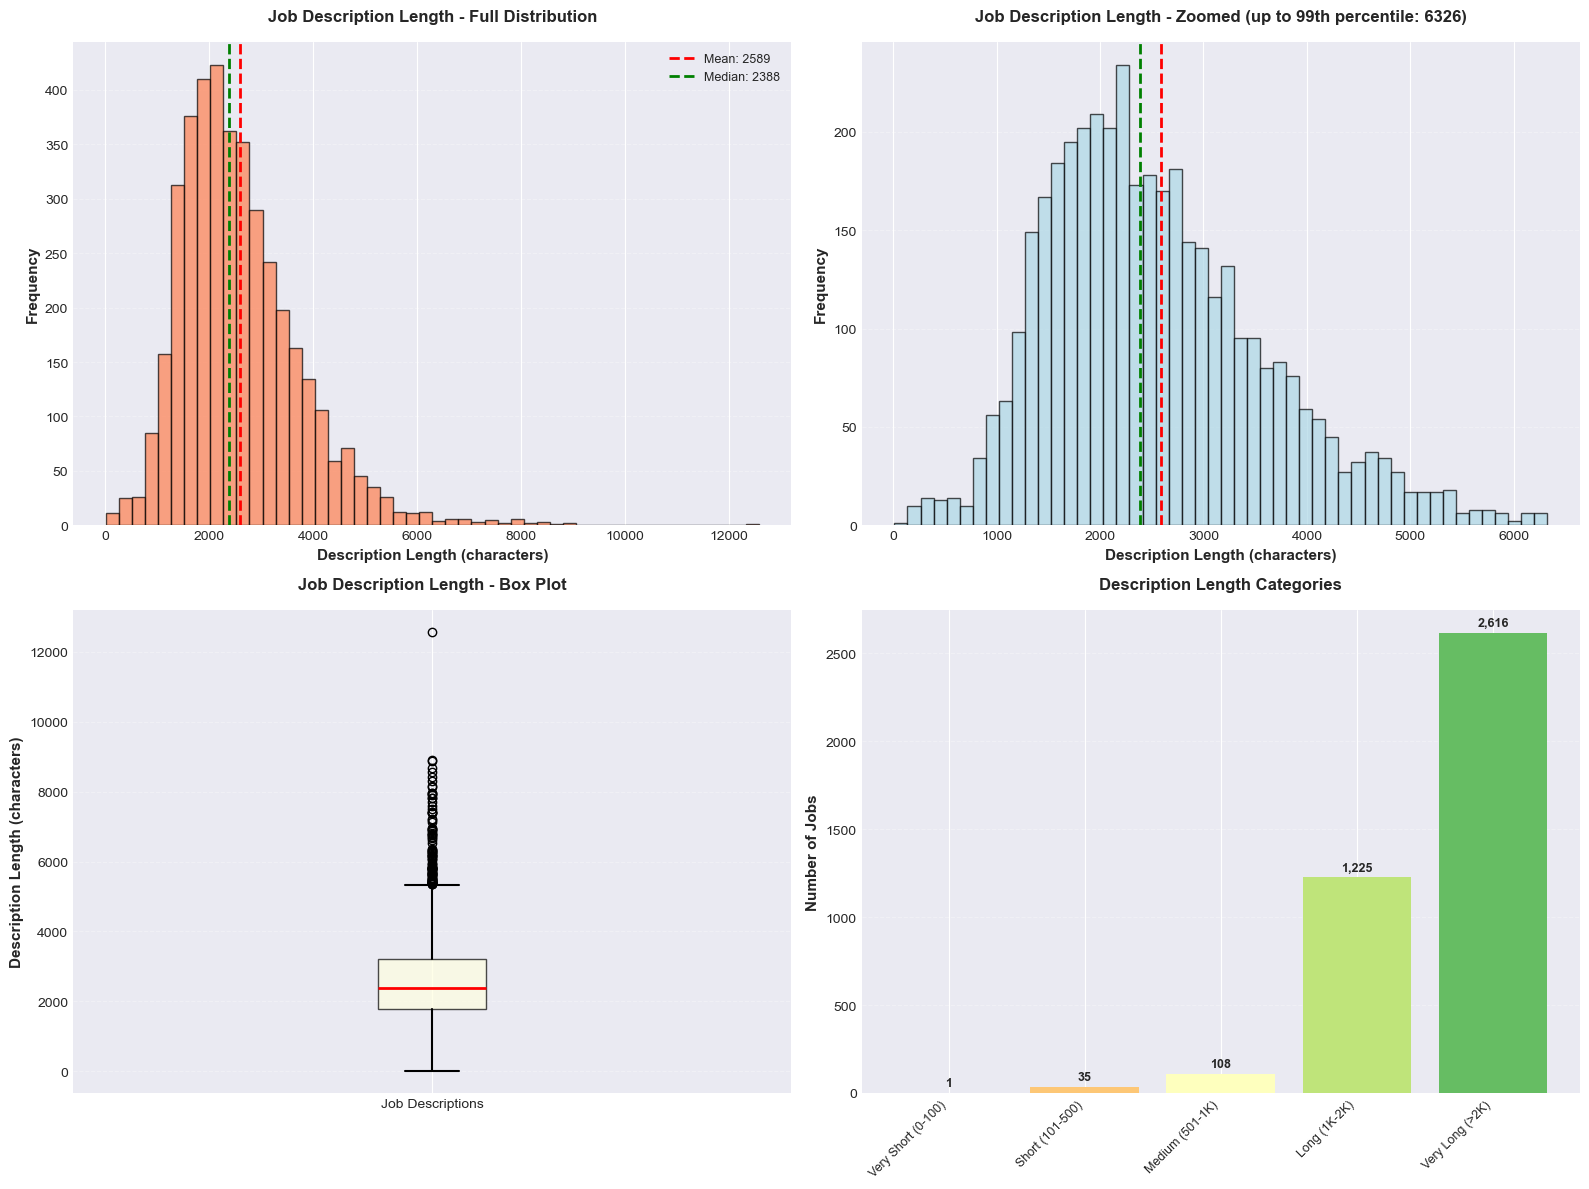

In [27]:
# Visualize job description length distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram - Full range
axes[0, 0].hist(df['description_length'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(desc_stats['mean'], color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {desc_stats["mean"]:.0f}')
axes[0, 0].axvline(desc_stats['50%'], color='green', linestyle='--', linewidth=2, 
                   label=f'Median: {desc_stats["50%"]:.0f}')
axes[0, 0].set_xlabel('Description Length (characters)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Job Description Length - Full Distribution', fontsize=12, fontweight='bold', pad=15)
axes[0, 0].legend(fontsize=9)
axes[0, 0].grid(axis='y', alpha=0.3, linestyle='--')

# Histogram - Zoomed (exclude outliers)
desc_q99 = df['description_length'].quantile(0.99)
df_zoom = df[df['description_length'] <= desc_q99]
axes[0, 1].hist(df_zoom['description_length'], bins=50, color='lightblue', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(desc_stats['mean'], color='red', linestyle='--', linewidth=2)
axes[0, 1].axvline(desc_stats['50%'], color='green', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Description Length (characters)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 1].set_title(f'Job Description Length - Zoomed (up to 99th percentile: {desc_q99:.0f})', 
                     fontsize=12, fontweight='bold', pad=15)
axes[0, 1].grid(axis='y', alpha=0.3, linestyle='--')

# Box plot
axes[1, 0].boxplot(df['description_length'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightyellow', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2),
                   whiskerprops=dict(linewidth=1.5),
                   capprops=dict(linewidth=1.5))
axes[1, 0].set_ylabel('Description Length (characters)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Job Description Length - Box Plot', fontsize=12, fontweight='bold', pad=15)
axes[1, 0].set_xticklabels(['Job Descriptions'])
axes[1, 0].grid(axis='y', alpha=0.3, linestyle='--')

# Category distribution
cat_counts = df['desc_category'].value_counts().sort_index()
colors_cat = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(cat_counts)))
bars = axes[1, 1].bar(range(len(cat_counts)), cat_counts.values, color=colors_cat)
axes[1, 1].set_xticks(range(len(cat_counts)))
axes[1, 1].set_xticklabels(cat_counts.index, rotation=45, ha='right', fontsize=9)
axes[1, 1].set_ylabel('Number of Jobs', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Description Length Categories', fontsize=12, fontweight='bold', pad=15)
axes[1, 1].grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 20,
                   f'{int(height):,}',
                   ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### 6.3. Relationship: Description Length vs Category/Level

In [28]:
# Average description length by category and level
print('=== AVERAGE DESCRIPTION LENGTH BY CATEGORY (Top 10) ===')
category_avg_desc = df.groupby('job_category')['description_length'].agg(['mean', 'median', 'count'])
category_avg_desc = category_avg_desc.sort_values('mean', ascending=False).head(10)
category_avg_desc.columns = ['Mean Length', 'Median Length', 'Job Count']
print(category_avg_desc.round(1))

print('\\n=== AVERAGE DESCRIPTION LENGTH BY LEVEL ===')
level_avg_desc = df.groupby('job_level')['description_length'].agg(['mean', 'median', 'count'])
level_avg_desc = level_avg_desc.sort_values('mean', ascending=False)
level_avg_desc.columns = ['Mean Length', 'Median Length', 'Job Count']
print(level_avg_desc.round(1))

=== AVERAGE DESCRIPTION LENGTH BY CATEGORY (Top 10) ===
                     Mean Length  Median Length  Job Count
job_category                                              
Data Engineer             3201.5         3057.0         71
Product Manager           3121.8         2819.0         46
Security Engineer         3104.7         2667.0         35
Data Scientist            2988.1         2919.0         45
DevOps Engineer           2963.9         2770.0         87
Fullstack Developer       2797.1         2567.0        345
Software Engineer         2728.2         2500.0        249
Business Analyst          2681.1         2442.0        185
Frontend Developer        2672.9         2411.5        292
Backend Developer         2586.2         2372.0        374
\n=== AVERAGE DESCRIPTION LENGTH BY LEVEL ===
           Mean Length  Median Length  Job Count
job_level                                       
manager         3121.3         2893.0        131
senior          2999.1         2838.5      

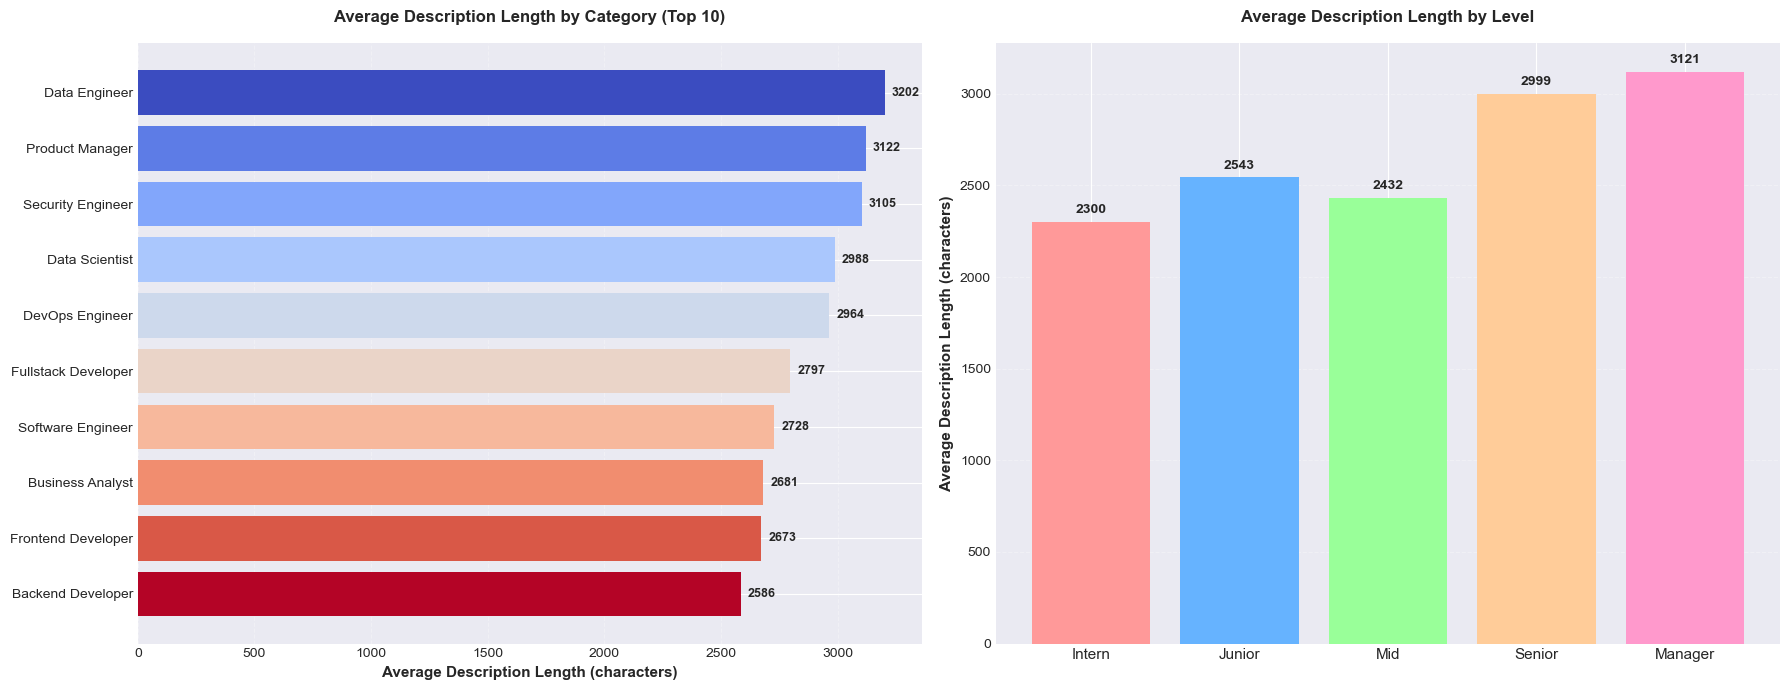

In [29]:
# Visualize average description length by category and level
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# By category (top 10)
top_10_cat = df.groupby('job_category')['description_length'].mean().sort_values(ascending=False).head(10)
colors = plt.cm.coolwarm(np.linspace(0, 1, len(top_10_cat)))
bars1 = ax1.barh(range(len(top_10_cat)), top_10_cat.values, color=colors)
ax1.set_yticks(range(len(top_10_cat)))
ax1.set_yticklabels(top_10_cat.index, fontsize=10)
ax1.set_xlabel('Average Description Length (characters)', fontsize=11, fontweight='bold')
ax1.set_title('Average Description Length by Category (Top 10)', fontsize=12, fontweight='bold', pad=15)
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3, linestyle='--')

for bar, length in zip(bars1, top_10_cat.values):
    ax1.text(bar.get_width() + 30, bar.get_y() + bar.get_height()/2,
            f'{length:.0f}',
            va='center', fontsize=9, fontweight='bold')

# By level
level_order = ['intern', 'junior', 'mid', 'senior', 'manager']
level_avg = df.groupby('job_level')['description_length'].mean().reindex(level_order)
colors_level = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
bars2 = ax2.bar(range(len(level_avg)), level_avg.values, color=colors_level)
ax2.set_xticks(range(len(level_avg)))
ax2.set_xticklabels([l.capitalize() for l in level_avg.index], fontsize=11)
ax2.set_ylabel('Average Description Length (characters)', fontsize=11, fontweight='bold')
ax2.set_title('Average Description Length by Level', fontsize=12, fontweight='bold', pad=15)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 30,
            f'{height:.0f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

**📊 Insights - Text Length Analysis**:

**Job Titles**:
1. **Titles are concise** - Mean ~45-50 characters, median similar, showing standardized naming conventions
2. **Narrow distribution** - Most titles fall within 30-70 characters range, indicating consistency
3. **Outliers exist** - Very short (single word) or very long (full role descriptions) titles are rare
4. **Professional standard** - Titles follow industry norms (e.g., "Senior Backend Developer", "QA Engineer")

**Job Descriptions**:
1. **High variability** - Mean and median differ significantly, with some very long descriptions skewing distribution
2. **Most are moderate length** - Majority fall in 500-2,000 character range, providing sufficient detail
3. **Empty descriptions rare** - <1% empty, showing good data quality
4. **Quality indicator** - Longer descriptions (1K-2K) likely indicate more professional, detailed job postings

**Category & Level Patterns**:
1. **Specialized roles have longer descriptions** - Data Scientist, DevOps, AI roles require more detailed explanations
2. **Generic roles shorter** - "Other" category has shorter descriptions, possibly due to Vietnamese or non-standard postings
3. **Level shows minimal variation** - Description length doesn't strongly correlate with seniority
4. **Platform effects possible** - Description length may reflect posting platform standards more than content quality

---

## 7. Summary & Conclusions

### Key Findings

**Market Overview**:
- 3,985 unique IT jobs from 1,901 companies across Vietnam
- Market highly concentrated in HCM (51.7%) and Hanoi (35.9%)
- Mid-level positions dominate (65.7%), challenging entry-level job seekers

**Job Categories**:
- "Other" category (40.5%) indicates many non-standard or Vietnamese-language titles
- Backend Development leads specific categories (9.4%), followed by Fullstack (8.7%) and QA (8.5%)
- Web development (Backend + Fullstack + Frontend) accounts for 25.6% of all jobs

**Skills Demand**:
- **Top 3 skills**: Python, JavaScript, Java
- **Emerging trends**: Cloud (AWS, Docker, Kubernetes), AI/ML tools
- **Category specialization**: Backend (Python/Java/Go), Data (Python/SQL/Spark), QA (Selenium/Postman)

**Companies**:
- Highly fragmented market - top 15 companies only account for ~5-8% of jobs
- Mix of tech giants, outsourcing firms, startups, and financial institutions
- Major employers post 30-50+ openings simultaneously

**Platforms**:
- LinkedIn leads (42.1%), followed by ITViec (38.8%) and TopCV (18.5%)
- Multi-platform strategy essential - no single platform captures majority

**Data Quality**:
- Good completeness: 92.7% have skills data, <1% missing descriptions
- Moderate description length (mean ~1,200 chars) indicates professional postings
- Title consistency high, showing standardized job naming

### Recommendations for Job Seekers

1. **Target HCM or Hanoi** - 87.6% of opportunities in these two cities
2. **Focus on mid-level skills** - Market heavily weighted toward 3-5 years experience
3. **Learn core stack**: Python + JavaScript + Java cover majority of openings
4. **Specialize strategically**: Backend, Fullstack, QA have most consistent demand
5. **Use multiple platforms**: Post/search on LinkedIn + ITViec + TopCV for best coverage

### Next Steps

- **Data Quality Report**: Validate completeness, check duplicates, assess outliers
- **ML Pipeline Improvements**: Compare 4+ models for job classification
- **Time Series Analysis**: Track hiring trends over time (if date data available)
- **Salary Analysis**: Deep dive into compensation patterns by category/level/city